<a href="https://colab.research.google.com/github/axieax/csc311/blob/main/csc311_final_project_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the demo on CSC311 final project!

The purpose of this document is to clarify the dataset and starter code. Before you start looking at the demo, read the project handout carefully to understand what task you are trying to solve. You can access the final project handout [here](http://www.cs.toronto.edu/~rgrosse/courses/csc311_f20/project/project.pdf).

**Note: Do not directly run the cells. Make a copy of the Colab and run the cells.**

Agenda:

1. Download the starter code
2. Explore the data
3. Example: prediction with majority vote
4. Upload your prediction to Kaggle

At the end of this demo, you will be familiar with the provided starter code and data, and you should be able to upload your predictions to Kaggle.

## 1. Download the starter code

We should first install the starter code from the course website.

In [ ]:
!wget http://www.cs.toronto.edu/~rgrosse/courses/csc311_f20/project/final_project.zip
!unzip final_project.zip

--2020-11-03 12:11:46--  http://www.cs.toronto.edu/~rgrosse/courses/csc311_f20/project/final_project.zip
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444833 (434K) [application/zip]
Saving to: ‘final_project.zip’

final_project.zip   100%[===================>] 434.41K   296KB/s    in 1.5s    

2020-11-03 12:11:48 (296 KB/s) - ‘final_project.zip’ saved [444833/444833]

Archive:  final_project.zip
   creating: starter_code/
  inflating: starter_code/majority_vote.py  
  inflating: starter_code/utils.py   
   creating: starter_code/part_a/
  inflating: starter_code/part_a/item_response.py  
  inflating: starter_code/part_a/__init__.py  
  inflating: starter_code/part_a/knn.py  
  inflating: starter_code/part_a/matrix_factorization.py  
  inflating: starter_code/part_a/ensemble.py  
  inflating: starter_code/part_a/neural_network.p

In [ ]:
!ls starter_code/

data  majority_vote.py	part_a	utils.py


Let's also add the environment variable so that we can use functions provided in the starter code (`utils.py`).

In [ ]:
import sys
sys.path.append('starter_code/')

We can now use all functions in ```utils.py```!



In [ ]:
from utils import *

## 2. Exploring the Dataset

You may access the dataset in two ways: (a) dictionary representation and (b) sparse matrix representation. You need to think of what data format you need for each learning algorithm you implement.

### (a) Dictionary Representation

Let's first load the training dataset in a dictionary.

In [ ]:
train_data = load_train_csv("starter_code/data")

The datasets loaded from the functions that end with csv is a dictionary that has three keys: 

*   question_id: ID of the question answered (starts from 0)
*   user_id: ID of the student who answered the question (starts from 0)
*   is_correct: Binary indicator whether the student’s answer was correct (0 is incorrect, 1 is correct).

In [ ]:
train_data.keys()

dict_keys(['user_id', 'question_id', 'is_correct'])

We can examine how many entries we have for the training data.

In [ ]:
len(train_data["user_id"])

56688

In [ ]:
len(train_data["user_id"]) == len(train_data["question_id"]) == len(train_data["is_correct"])

True

There are in total 56688 entries in the training data. We can further see how many unique students and questions we have in the training data.

In [ ]:
len(set(train_data["user_id"])), len(set(train_data["question_id"])),

(542, 1774)

There are in total 542 unique users and 1774 unique questions!

Next, let's observe how many correct and incorrect answers there are in the training data.

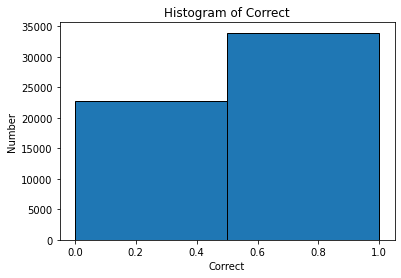

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train_data["is_correct"], edgecolor='black', bins=2)
plt.xlabel("Correct")
plt.ylabel("Number")
plt.title("Histogram of Correct")
plt.show()

We have more correct answers than incorrect answers in the provided dataset.

We can also see how many questions each student answered.

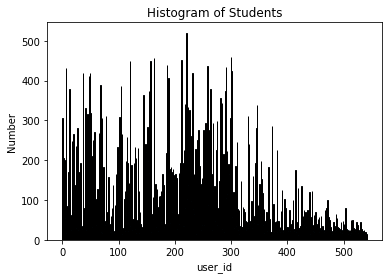

In [ ]:
plt.hist(train_data["user_id"], edgecolor='black', bins=542)
plt.xlabel("user_id")
plt.ylabel("Number")
plt.title("Histogram of Students")
plt.show()

Some students answered more questions and some students answered less questions.

In [ ]:
user_answer_count = {i: 0 for i in range(0, 542)}
for u in train_data["user_id"]:
    user_answer_count[u] += 1

max(user_answer_count.values()), min(user_answer_count.values())

(520, 12)

The student with most answeres answered 520 questions and the student with least answers answered 12 question. 

We can also examine how many times each questions was answered.

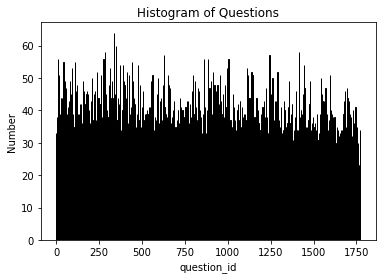

In [ ]:
plt.hist(train_data["question_id"], edgecolor='black', bins=1774)
plt.xlabel("question_id")
plt.ylabel("Number")
plt.title("Histogram of Questions")
plt.show()

In [ ]:
question_answer_count = {i: 0 for i in range(0, 1774)}
for u in train_data["question_id"]:
    question_answer_count[u] += 1

max(question_answer_count.values()), min(question_answer_count.values())

(64, 5)

The most answered question was answered 64 times and the least answered question was answered 5 times.

For now, we only looked at the training dataset. However, the way in which the validation and test dataset are stored are the same.

In [ ]:
valid_data = load_valid_csv("starter_code/data")
test_data = load_public_test_csv("starter_code/data")

In [ ]:
len(valid_data["user_id"]), len(test_data["user_id"])

(7086, 3543)

There are 7086 and 3543 entries for each validation and test data.

In [ ]:
len(set(valid_data["user_id"])), len(set(valid_data["question_id"])),

(534, 1730)

In [ ]:
len(set(test_data["user_id"])), len(set(test_data["question_id"])),

(488, 1514)

And there are (534, 1730) unique entries for validation data and (488, 1514) unique entries for test data.

## (b) Sparse matrix representation

We can also load the dataset in sparse matrix representation.

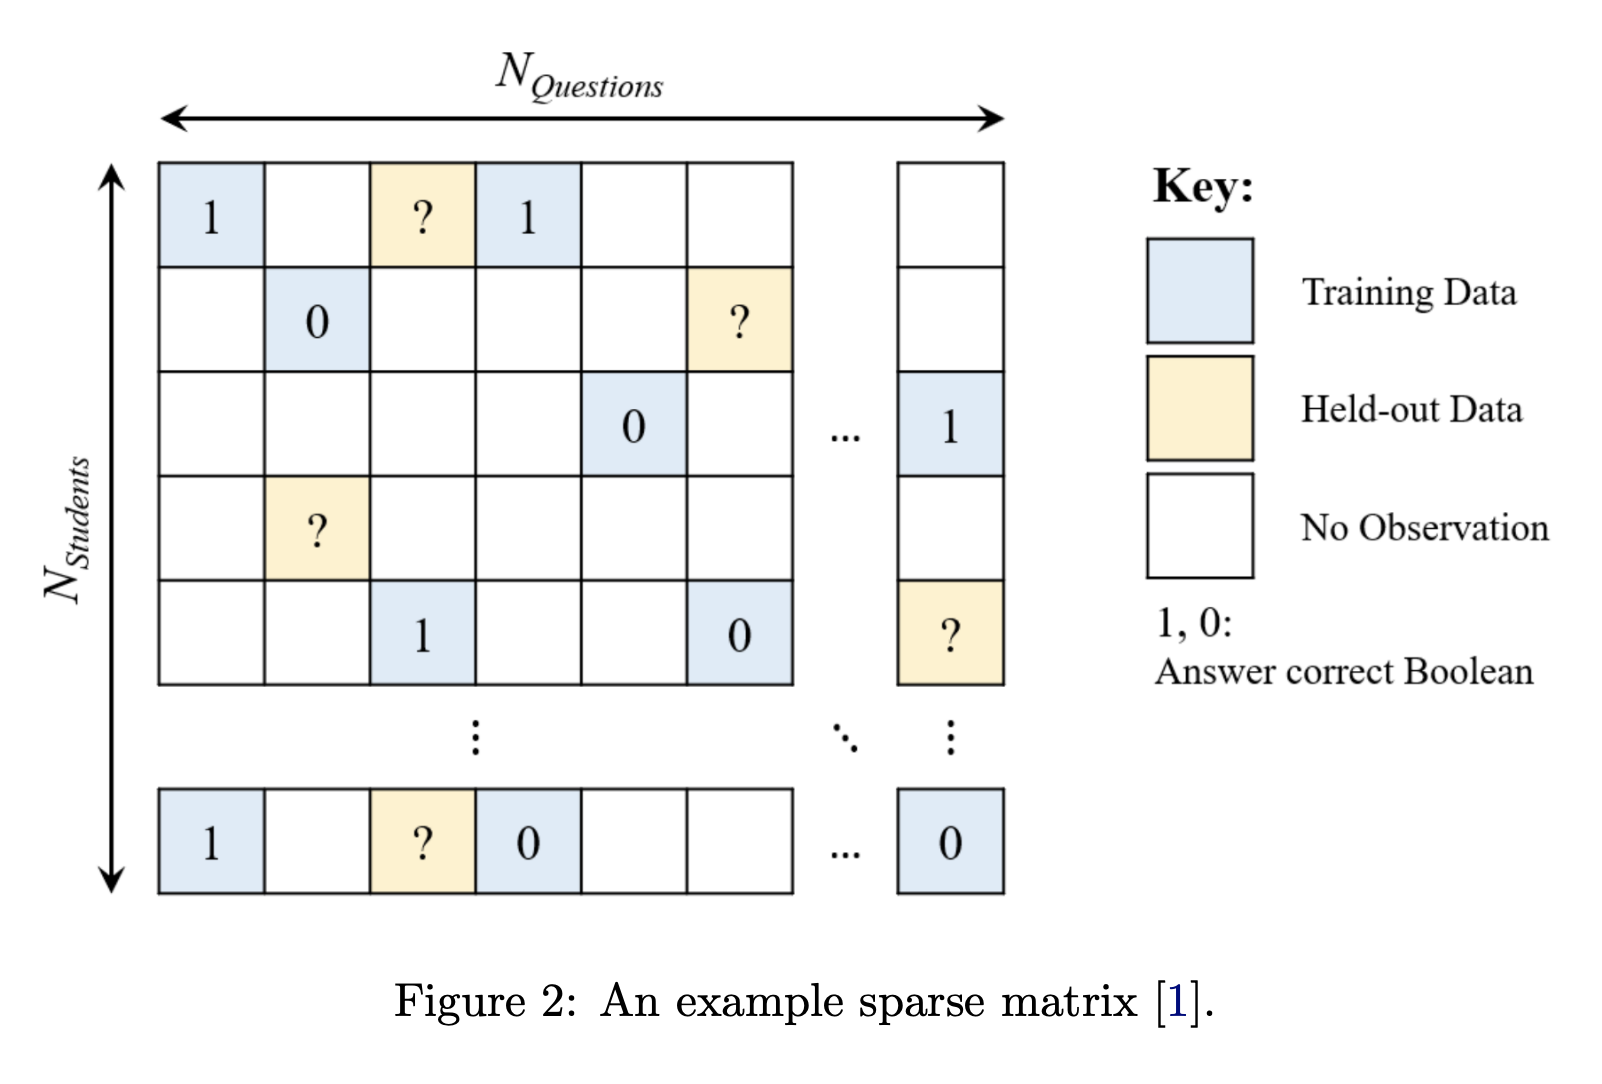

Each row corresponds to the user_id and each column corresponds to the question_id. The correct answer given a pair of (user_id, question_id) will have an entry 1 and an incorrect answer will have an entry 0. Answers with no observation and held-out data (that will be used for validation and test) will have an entry NaN (np.NaN).

In [ ]:
matrix = load_train_sparse("starter_code/data")

In [ ]:
matrix

<542x1774 sparse matrix of type '<class 'numpy.float64'>'
	with 938744 stored elements in Compressed Sparse Column format>

In [ ]:
matrix.shape

(542, 1774)

As expected, the sparse matrix has 542 rows and 1774 columns.

You may also change the type of the sparse matrix to numpy array by using `.toarray()` method.

In [ ]:
matrix.toarray()

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan,  0., nan, ..., nan, nan, nan],
       [nan, nan,  1., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

Let's visualize our sparse matrix.

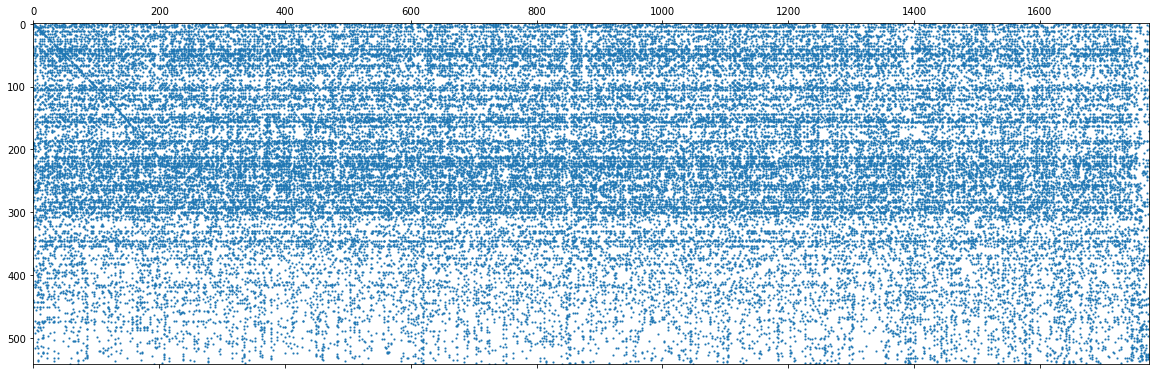

In [ ]:
import copy
temp_matrix = copy.deepcopy(matrix).toarray()
temp_matrix[temp_matrix == 0] = 1.
temp_matrix = np.nan_to_num(temp_matrix)
plt.figure(figsize=(20, 20))
plt.spy(temp_matrix, markersize=1)

We can also compute the sparsity of the matrix. 

In [ ]:
1 - np.isnan(matrix.toarray()).sum() / np.prod(matrix.shape)

0.058957387770044556

This means that only 5.9\% of the entries are filled in the training data.

## 3. Example: prediction with majority vote

A very simple algorithm is to look whether the question was answered correctly more than 50 percent of the time. It will predict 1 if it was answered correctly more than 50 percent of the time and 0 otherwise.

We first load all training, validation, and test data.

In [ ]:
train_data = load_train_csv("starter_code/data")
valid_data = load_valid_csv("starter_code/data")
test_data = load_public_test_csv("starter_code/data")

We first need to compute how many times each question was answered correctly and incorrectly.

In [ ]:
correct_question_map = {}
total_question_map = {}

# Count how many questions were correct.
for i, q in enumerate(train_data["question_id"]):
    if q in correct_question_map:
        if train_data["is_correct"][i] == 1:
            correct_question_map[q] += 1
        total_question_map[q] += 1
    else:
        if train_data["is_correct"][i] == 1:
            correct_question_map[q] = 1
        total_question_map[q] = 1

Using these information let's predict the validation data and compute the accuracy. You may use the function `evaluate` to compute the accuracy.

In [ ]:
predictions = []
for i, q in enumerate(valid_data["question_id"]):
    ratio = correct_question_map[q] / float(total_question_map[q])
    # If the question was answered correctly more than half
    # of the times, predict correct.
    if ratio >= 0.5:
        predictions.append(1.)
    else:
        predictions.append(0.)
# Evaluate your model using the new prediction.
acc = evaluate(valid_data, predictions)
print("Validation Accuracy: {}".format(acc))

Validation Accuracy: 0.6203782105560259


We can do the same for the test data.

In [ ]:
predictions = []
for i, q in enumerate(test_data["question_id"]):
    ratio = correct_question_map[q] / float(total_question_map[q])
    if ratio >= 0.5:
        predictions.append(1.)
    else:
        predictions.append(0.)
acc = evaluate(test_data, predictions)
print("Test Accuracy: {}".format(acc))

Test Accuracy: 0.62884561106407


We just built our first algorithm that has 62.88\% accuracy on the test data! The algorithms you build in Part A (and hopefully Part B) should have higher accuracy than this!

# 4. Upload your prediction to Kaggle

Optionally, you will take part in a competition where you will submit the predictions of your model on a private test dataset. 

You should first create a Kaggle account and join the competition using this link:

https://www.kaggle.com/t/51c62bffb0f348008333b29ab4385b23

You should first load the private test dataset on your starter code. The private test dataset does not have a label (is_correct).

In [ ]:
private_test = load_private_test_csv("starter_code/data")

In [ ]:
private_test.keys()

dict_keys(['user_id', 'question_id', 'is_correct'])

In [ ]:
private_test["is_correct"]

[]

As expected, is_correct column has an empty list.

You need to compute the predictions of your model and replace the key is_correct with your predictions. Let's go back to our previous example (majority vote) to do this.

In [ ]:
predictions = []
for i, q in enumerate(private_test["question_id"]):
    ratio = correct_question_map[q] / float(total_question_map[q])
    if ratio >= 0.5:
        predictions.append(1.)
    else:
        predictions.append(0.)
private_test["is_correct"] = predictions

Now, the dictionary `private_test` contains a set of predictions made by your model! You can save your predictions on csv file using a function `save_private_test_csv` provided in `utils.py`.

In [ ]:
save_private_test_csv(private_test)

This will save a file `private_test_result.csv` in your local computer. Try uploading this file to the Kaggle competition and you will see your team name on the leaderboard! 

Remember that the top 3 teams with the highest performance on all private data will receive a special gift from the instructors.